## With our dataset

In [34]:
from sklearn import preprocessing
import pandas as pd

##### Data load

In [44]:
data=pd.read_csv("data/car_data/car.data", sep= ',', header= None)

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data = np.asarray(data)

In [45]:
print(data.shape)

(1728, 7)


In [46]:
dataX = data[:,0:6]
dataY = data[:,6]

In [53]:
n_samples = data.shape[0]
dim_in = 6 
dim_out = 4

n_train = int(n_samples * 0.7)
n_test = n_samples - n_train

In [54]:
# train-test partition
perm = np.random.permutation(n_samples)
train_indx = perm[:n_train]
test_indx = perm[n_train:]

dataX_train, dataY_train = dataX[train_indx,:], dataY[train_indx]
dataX_test, dataY_test = dataX[test_indx,:], dataY[test_indx]

In [55]:
dim_hidden1 = 100
dim_hidden2 = 150
model = Net(dim_in, dim_hidden1, dim_hidden2, dim_out)

In [56]:
x = torch.from_numpy(dataX_train).type(dtype_torch)
y = torch.from_numpy(dataY_train).type(torch.LongTensor)

In [57]:
learning_rate = 1e-2
n_iteration = 1000

In [58]:
logger = {}
logger['iteration'] = []
logger['loss_iteration'] = []

for t in range(n_iteration):  
    
    # forward pass
    y_pred = model(x)
    
    # compute loss
    loss = criterion(y_pred, y)

    # backprop
    loss.backward()

    # update weights using gradient descent  
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data 
    
    # manually zero the gradients
    model.zero_grad()  
    
    # reporting & logging       
    if t % 100 == 0:
        print(t, loss.item())
        
    logger['iteration'] += [t]
    logger['loss_iteration'] += [loss.item()]

0 1.2677693367004395
100 0.7391719818115234
200 0.7179017066955566
300 0.7068893313407898
400 0.6992645859718323
500 0.6934142708778381
600 0.6884718537330627
700 0.6840059757232666
800 0.6798460483551025
900 0.675817608833313


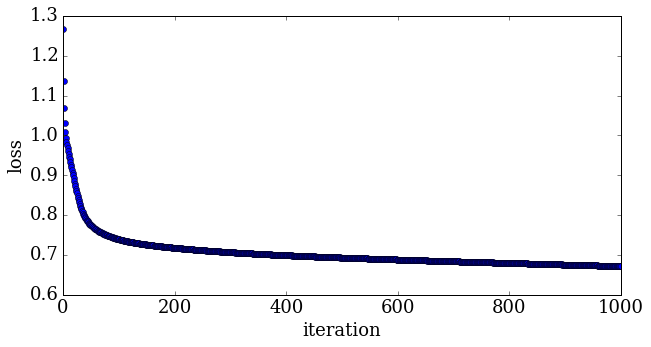

In [59]:
# visualize loss
plt.figure(figsize=(10,5))
plt.plot(logger['iteration'], logger['loss_iteration'],'ob', label="loss")

plt.xlabel('iteration')
plt.ylabel('loss');

In [60]:
y_train_predict = predict(dataX_train,model)
print("Train accuracy: %f" % get_accuracy(y_train_predict, dataY_train))

y_test_predict = predict(dataX_test, model)
print("Test accuracy: %f" % get_accuracy(y_test_predict, dataY_test))

Train accuracy: 70.140612
Test accuracy: 71.098266
